In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from src.utils import pie_plot

In this jupyter notebook we are going to visualize and analyze the variable isFlaggedFraud that comes from a model that flags transactions fraudulent transactions over 200.000

In [8]:
df = pd.read_csv('../../data/raw/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
total_flagged = df.query('amount > 200000.00').copy()
total_flagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


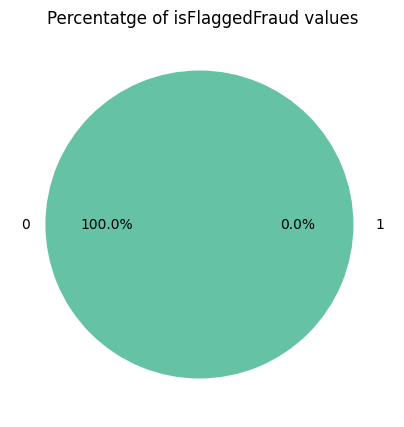

In [12]:
pie_plot(total_flagged['isFlaggedFraud'])

In [14]:
print('Amount of labelled and unlabelled as Fraud transactions:')
total_flagged['isFlaggedFraud'].value_counts()

Amount of labelled and unlabelled as Fraud transactions:


isFlaggedFraud
0    1673554
1         16
Name: count, dtype: int64

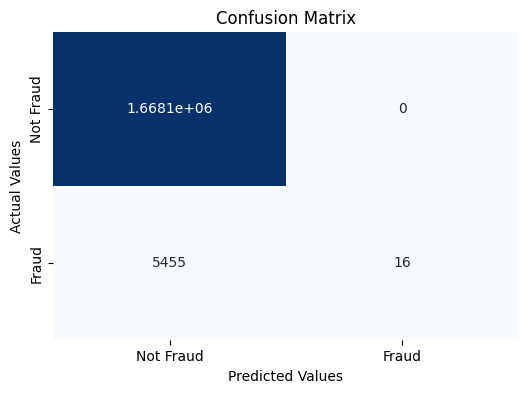

In [15]:
conf_matrix = confusion_matrix(total_flagged['isFraud'], total_flagged['isFlaggedFraud'])

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.show()

In this scenario, the dataset exhibits a significant class imbalance, requiring careful handling.

Two critical aspects need consideration:

- False Positives: These occur when legitimate customers attempt transactions, yet the model incorrectly flags them as fraudulent. This may lead to customer dissatisfaction and potential loss of the customer.

- False Negatives: This category includes instances where fraudulent transactions are processed as legitimate by the model. Failing to identify such cases could result in financial losses for the customer or the merchant.

All transactions labelled as fraud were actually fraudulent

In [21]:
fraud_not_flagged = total_flagged.loc[(total_flagged.isFlaggedFraud == 0) & (total_flagged.isFraud ==1)].reset_index(drop = True)
fraud_not_flagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
1,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1,0
2,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
3,1,TRANSFER,235238.66,C1872047468,235238.66,0.0,C116289363,0.00,0.00,1,0
4,1,CASH_OUT,235238.66,C1499825229,235238.66,0.0,C2100440237,0.00,235238.66,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5450,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
5451,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
5452,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
5453,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [23]:
emptied_acc = fraud_not_flagged.groupby('newbalanceOrig').count()
emptied_acc

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
newbalanceOrig,,,,,,,,,,
0.00,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312
175597.64,1,1,1,1,1,1,1,1,1,1
185510.21,1,1,1,1,1,1,1,1,1,1
353874.22,1,1,1,1,1,1,1,1,1,1
390763.24,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
37316255.05,1,1,1,1,1,1,1,1,1,1
39585040.37,1,1,1,1,1,1,1,1,1,1
40399045.08,1,1,1,1,1,1,1,1,1,1


Observations:

Most fraud transactions but not labelled as such have emptied the accounts. That makes me wonder if they would know the balance beforehand. 